In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 289s 2us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])

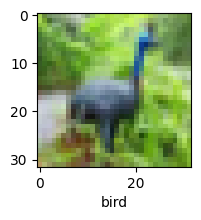

In [14]:
show_image(x_train,y_train,6)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
model = keras.Sequential([
    #CNN layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (32,32,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #ANN layers
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 11)

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.4166 - loss: 1.6068
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6345 - loss: 1.0338
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7018 - loss: 0.8555
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7484 - loss: 0.7208
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7964 - loss: 0.5908
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.8347 - loss: 0.4831
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8690 - loss: 0.3781
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9034 - loss: 0.2887
Epoch 9/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9292 - loss: 0.2116
Epoch 10/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9494 - loss: 0.1521
Epoch 11/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.9588 - loss: 0.1214


In [20]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 1.4416


[1.4542912244796753, 0.6988000273704529]

In [21]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.14480593e-12, 5.54930186e-04, 2.77367434e-07, ...,
        1.05177596e-12, 7.92886183e-08, 3.93502002e-11],
       [3.70213478e-11, 8.07661199e-05, 2.59226459e-17, ...,
        6.10461885e-25, 9.99918938e-01, 2.66488769e-07],
       [1.49513397e-03, 5.53711392e-02, 3.60992317e-07, ...,
        2.64392397e-09, 9.42803442e-01, 3.26485839e-04],
       ...,
       [2.15504166e-18, 6.29845343e-11, 3.63611936e-04, ...,
        3.03004686e-06, 2.06298889e-08, 7.55584221e-14],
       [4.85807220e-07, 1.30497152e-03, 8.50603647e-06, ...,
        4.42033361e-08, 1.03579124e-11, 2.66542322e-09],
       [6.43935093e-16, 4.85235356e-18, 4.20014121e-13, ...,
        9.99997497e-01, 8.98523493e-19, 2.34363069e-15]], dtype=float32)

In [25]:
y_pred_class = np.array([np.argmax(i) for i in y_pred])

In [23]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [26]:
y_pred_class

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.78      0.84      0.81      1000
           2       0.58      0.65      0.61      1000
           3       0.50      0.52      0.51      1000
           4       0.66      0.65      0.65      1000
           5       0.63      0.54      0.58      1000
           6       0.78      0.78      0.78      1000
           7       0.71      0.77      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [30]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[705,  21,  73,  28,  19,   8,  11,  17,  68,  50],
       [ 13, 838,   8,  12,   3,   4,  14,   6,  29,  73],
       [ 36,  10, 651,  63,  72,  53,  47,  44,  17,   7],
       [ 19,  16,  80, 521,  72, 139,  65,  57,  13,  18],
       [ 15,   9,  98,  68, 646,  35,  30,  87,   9,   3],
       [ 14,  10,  76, 201,  46, 540,  29,  63,  10,  11],
       [  4,  12,  67,  55,  48,  20, 776,   3,   9,   6],
       [  6,   2,  45,  34,  58,  46,  13, 767,   8,  21],
       [ 53,  45,  16,  26,   7,   6,   4,  14, 796,  33],
       [ 30, 105,   9,  27,   7,  10,   6,  19,  39, 748]], dtype=int64)